In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Box-Muller transform

**Problem** Given the random variable $X$ following the standard normal distribution $\mathcal{N}(0, 1)$, generate values of $X$.

**Method** 

To generate 2 values, do:

1. Sample $u_1$ and $u_2$ independently from $\text{Uniform}([0, 1])$.
2. Compute 
$$
    z_1 = \sqrt{-2 \ln u1} \cos (2\pi u_2)
$$
$$
    z_2 = \sqrt{-2 \ln u1} \sin (2\pi u_2)
$$

In [3]:
def box_muller(mu=0, sigma=1, N=1):
    # Number of samples needed
    M = N // 2 + 1
    
    # Sample from the uniform distribution
    u = np.random.rand(2, M)

    # Compute the values
    R = np.sqrt(-2 * np.log(u[0]))
    O = 2 * np.pi * u[1]
    z = np.hstack([
        R * np.cos(O),
        R * np.sin(O)
    ])[:N]

    # Scale and ranslate
    z = z * sigma + mu

    if N == 1:
        return z[0]
    return z

**Proof of correctness**

Let $R = \sqrt{-2\ln U_1}$ where $U_1 \sim \text{Uniform}([0, 1])$. Its CDF is
$$
    F_R(r) = P(R \leq r) 
    = P(\sqrt{-2\ln U_1} \leq r) 
    = P \left[ U_1 \geq \exp \left( -\frac{r^2}{2} \right) \right] =  1 - \exp \left( -\frac{r^2}{2} \right).
$$
Therefore its PDF is
$$
    f_R(r) = \frac{dF_R}{dr}(r) = r \exp \left( -\frac{r^2}{2} \right), r \geq 0.
$$

Let $\Theta = 2\pi U_2$ where $U_2 \sim \text{Uniform}(0, 1)$, then $\Theta \sim \text{Uniform}(0, 2\pi)$ and its PDF is
$$
    f_\Theta(\theta) = \frac{1}{2\pi}, \theta \in [0, 2\pi].
$$

Since $U_1$ and $U_2$ are independent, $R$ and $\Theta$ also are. Therefore
$$
    f_{R, \Theta}(r, \theta) = f_R(r) f_\Theta(\theta) = \frac{1}{2\pi} r \exp \left( -\frac{r^2}{2} \right).
$$

Let $g$ be the transformation function to the polar coordinate, $z = (z_1, z_2) = g(r, \theta) = (r \cos \theta, r \sin \theta)$ or $r = \sqrt{z_1^2 + z_2^2}$ and $\theta = \arctan z_2/z_1$.

We have
$$
    f_{Z_1, Z_2}(z_1, z_2)
    = f_{Z_1, Z_2}(g(r, \theta))
    = \frac{f_{R, \Theta}(r, \theta)}{|\det \frac{\partial g}{\partial z}|}
    = \frac{f_{R, \Theta}(r, \theta)}{r}
    = \frac{1}{2\pi} \exp \left( -\frac{r^2}{2} \right)
$$
which leads to
$$
    f_{Z_1, Z_2}(z_1, z_2)
    = \frac{1}{\sqrt{2\pi}} \exp \left( -\frac{z_1^2}{2} \right) \frac{1}{\sqrt{2\pi}} \exp \left( -\frac{z_2^2}{2} \right)
    = f_{Z_1}(z_1) f_{Z_2}(z_2).
$$

So each of $Z_1, Z_2$ is normally-distributed.

**Note**

1. Change of variable
$$
    f_X(x) = f_Y(g(x)) \left| \det \frac{\partial g}{\partial x} \right|
$$
2. For the polar coordinates,
$$
    \left|\det \frac{\partial g}{\partial z} \right| 
    = \left| \frac{\partial r\cos\theta}{\partial r}\frac{\partial r\sin\theta}{\partial \theta} - \frac{\partial r\sin\theta}{\partial r} \frac{\partial r\cos\theta}{\partial \theta} \right| 
    = |r \cos^2 \theta + r \sin^2 \theta| 
    = |r| = r, r \geq 0
$$

# Demo

In [4]:
def normal_pdf(x, mu, sigma):
    return np.exp(-(x - mu) ** 2 / (2 * sigma ** 2)) / (np.sqrt(2 * np.pi) * sigma)

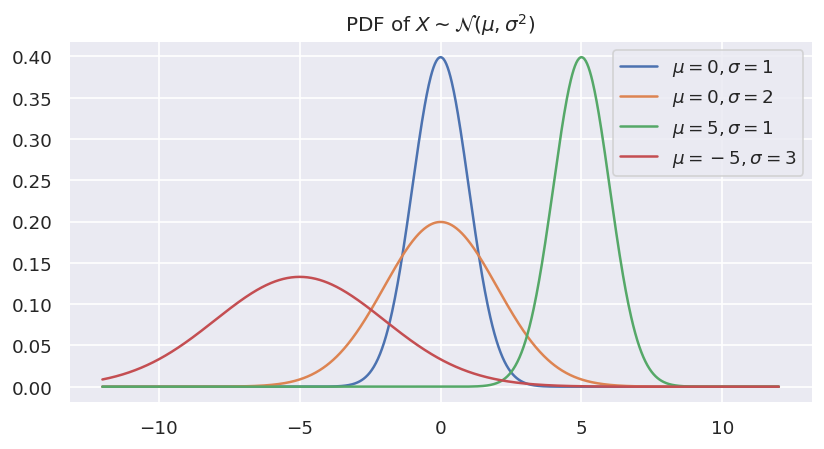

In [5]:
mus = [0, 0, 5, -5]
sigmas = [1, 2, 1, 3]

fig = plt.figure(figsize=(8, 4), dpi=120)
x = np.linspace(start=-12, stop=12, num=1000)
for mu, sigma in zip(mus, sigmas):
    f = normal_pdf(x, mu, sigma)
    plt.plot(x, f, label=f'$\mu = {mu}, \sigma = {sigma}$')
plt.title('PDF of $X \sim \mathcal{N}(\mu, \sigma^2)$')
plt.legend()
plt.show()

In [6]:
mu1 = 0
sigma1 = 1
N1 = 5000

X1 = box_muller(mu1, sigma1, N1)

In [7]:
mu2 = -5
sigma2 = 3
N2 = 5000

X2 = box_muller(mu2, sigma2, N2)

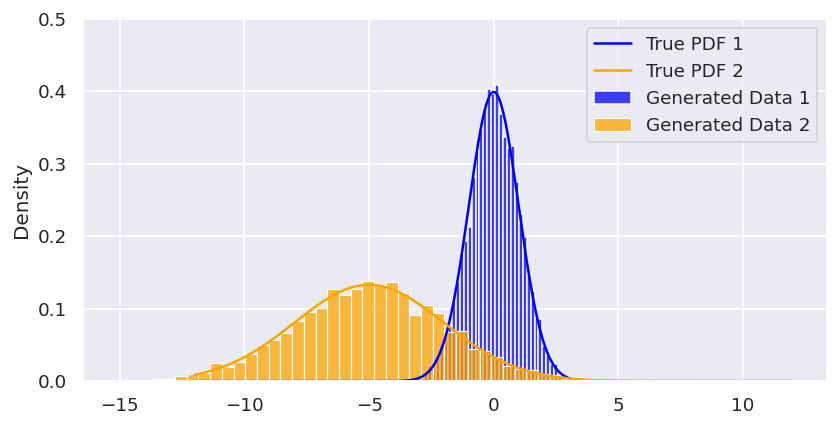

In [9]:
fig = plt.figure(figsize=(8, 4), dpi=120)

# Generated data density distribution
sns.histplot(X1, stat='density', label='Generated Data 1', color='blue')

# True PDF f(x)
x = np.linspace(start=-12, stop=12, num=1000)
f = normal_pdf(x, mu1, sigma1)
plt.plot(x, f, label='True PDF 1', color='blue')

# Generated data density distribution
sns.histplot(X2, stat='density', label='Generated Data 2', color='orange')

# True PDF f(x)
x = np.linspace(start=-12, stop=12, num=1000)
f = normal_pdf(x, mu2, sigma2)
plt.plot(x, f, label='True PDF 2', color='orange')

plt.ylim(0, 0.5)

plt.legend()
plt.show()